# Data Description:
The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the bus,
van and either one of the cars would be readily distinguishable, but it would be
more difficult to distinguish between the cars.
## Domain:
Object recognition
## Context:
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.
## Attribute Information:
● All the features are geometric features extracted from the silhouette.
● All are numeric in nature.
## Learning Outcomes:
● Exploratory Data Analysis
● Reduce number dimensions in the dataset with minimal information loss
● Train a model using Principal Components
## Objective:
Apply dimensionality reduction technique – PCA and train a model using
principal components instead of training the model using raw data.

#### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [1]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns


vehicle_df = pd.read_csv('vehicle.csv')

## 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [2]:
vehicle_df.shape

(846, 19)

In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [4]:
vehicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

#### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [5]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(vehicle_df['class'])

car    429
bus    218
van    199
Name: class, dtype: int64

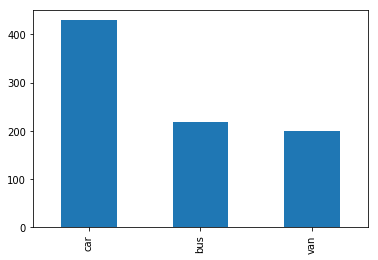

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

In [7]:
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

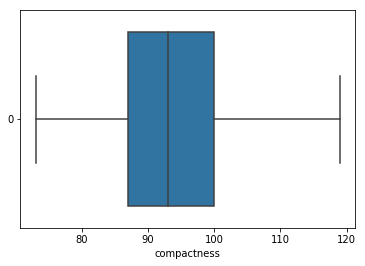

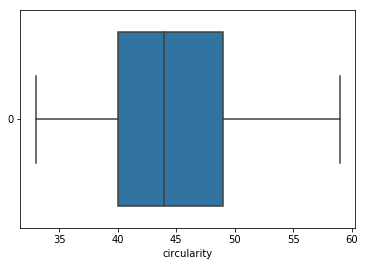

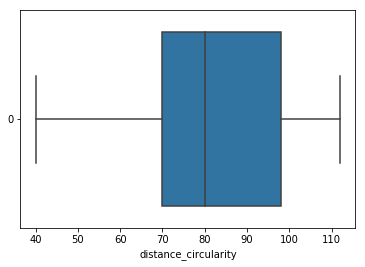

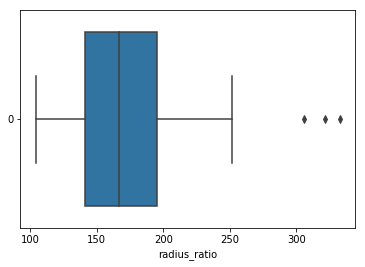

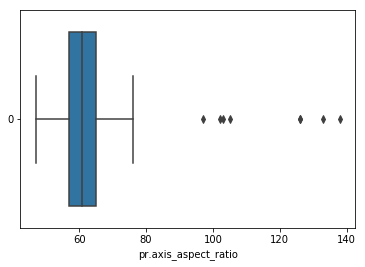

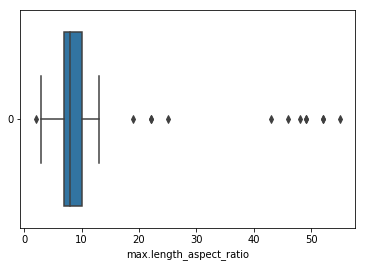

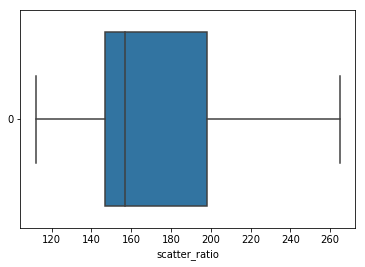

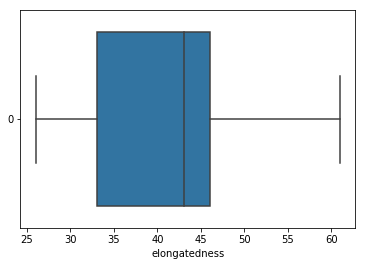

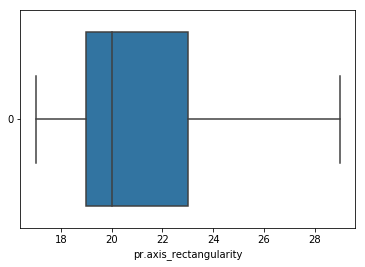

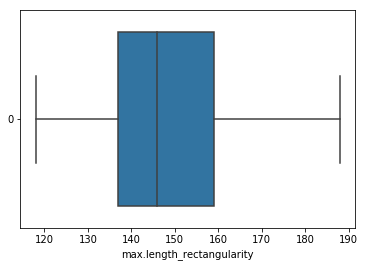

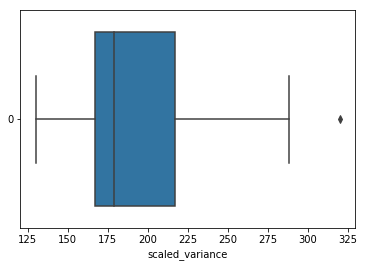

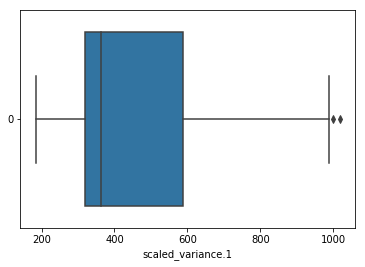

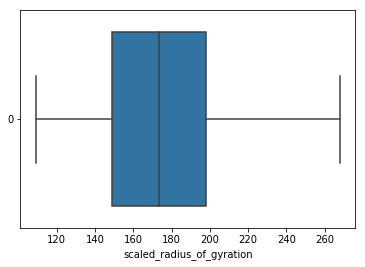

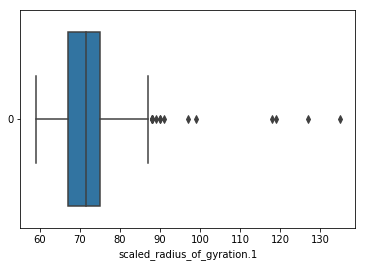

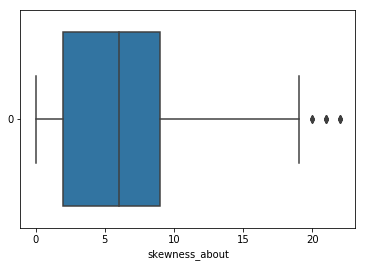

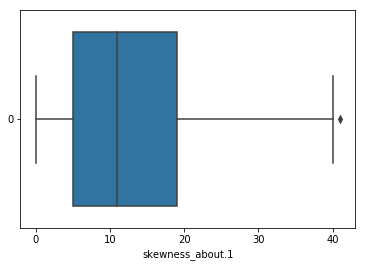

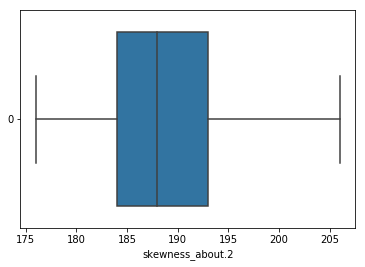

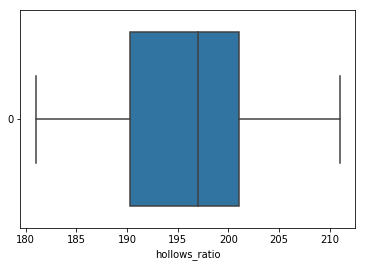

In [9]:
#several null values.. we will just look at the box plot now to check data shape and try and replace missing values

for column in vehicle_df.select_dtypes(include=[np.number]):
    plt.figure()
    box_plot = sns.boxplot(data=vehicle_df[column], orient="h")
    box_plot.set(xlabel=column)

In [10]:
vehicle_df_na_removed = vehicle_df.fillna(vehicle_df.median())

vehicle_df_na_removed.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

In [11]:
#Outlier removal -- we will make outliers collapse to 5th and 95th percentile
vehicle_df_na_removed.columns = ['compactness','circularity','distance_circularity','radius_ratio','pr_axis_aspect_ratio','max_length_aspect_ratio','scatter_ratio','elongatedness','pr_axis_rectangularity','max_length_rectangularity','scaled_variance','scaled_variance_1','scaled_radius_of_gyration','scaled_radius_of_gyration_1','skewness_about','skewness_about_1','skewness_about_2','hollows_ratio','class']
#found somthing at -- https://www.kaggle.com/general/24617

# a number "a" from the vector "x" is an outlier if 
# a > median(x)+1.5*iqr(x) or a < median-1.5*iqr(x)
# iqr: interquantile range = third interquantile - first interquantile
def outliers(x): 
       return np.abs(x- x.median()) > 1.5*(x.quantile(0.75)-x.quantile(0.25))

# Replace the upper outlier(s) with the 95th percentile and the lower one(s) with the 5th percentile 
def replace(x):   # x is a vector
    out = x[outliers(x)]
    return x.replace(to_replace = [out.min(),out.max()], value = [np.percentile(x,5),np.percentile(x,95)])

vehicle_df_out_normalized = vehicle_df_na_removed.select_dtypes(include=[np.number]).apply(replace,axis=0)
#vehicle_df_out_normalized.to_csv('vehicle_df_out_removed.csv')

vehicle_df_out_normalized.shape

(846, 18)

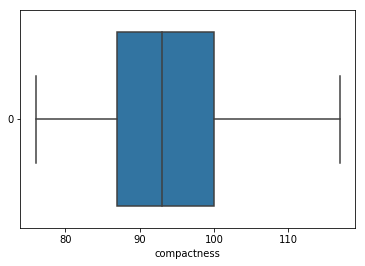

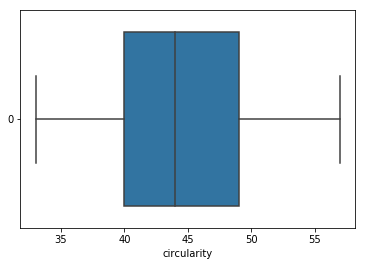

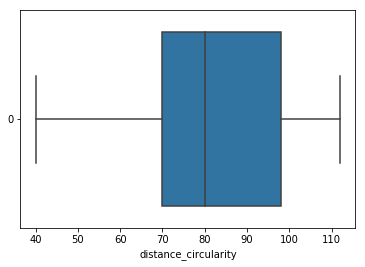

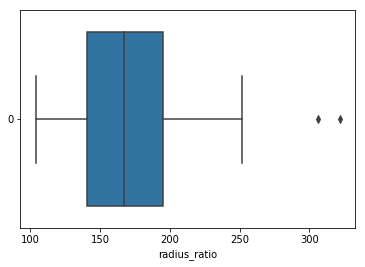

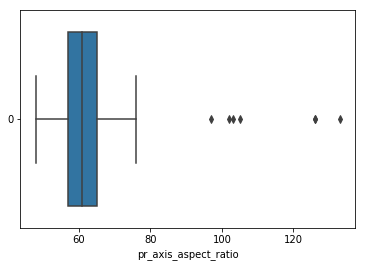

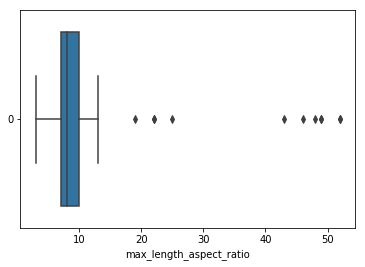

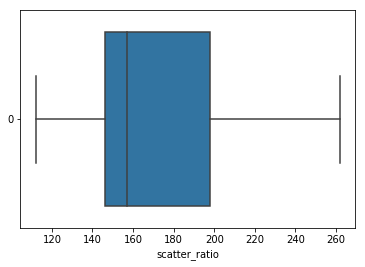

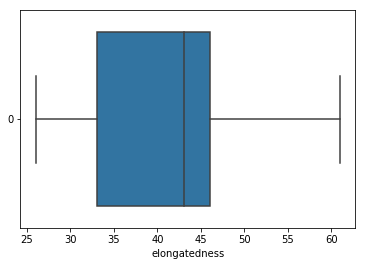

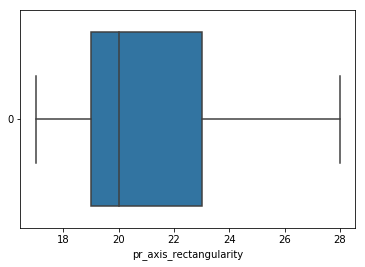

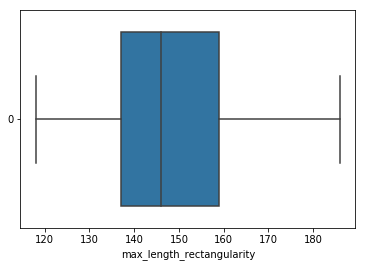

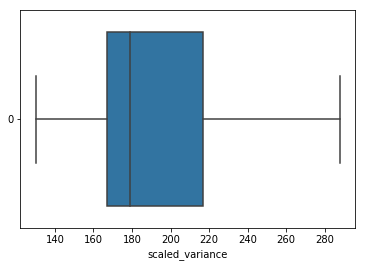

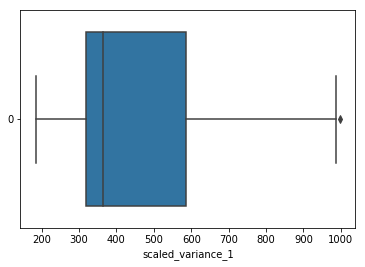

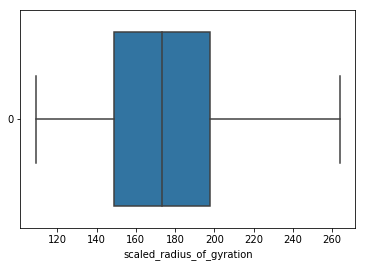

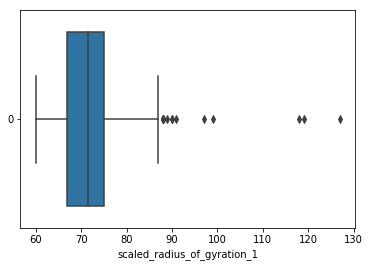

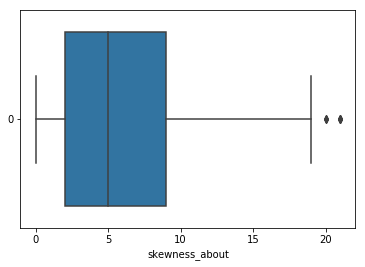

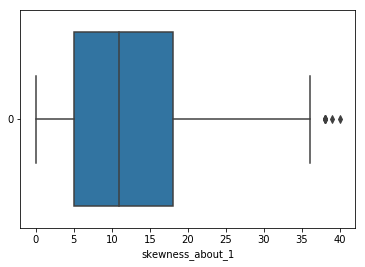

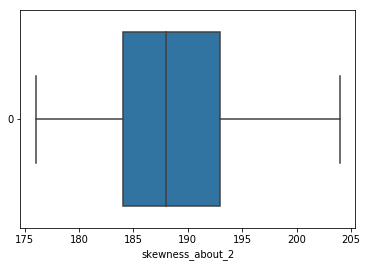

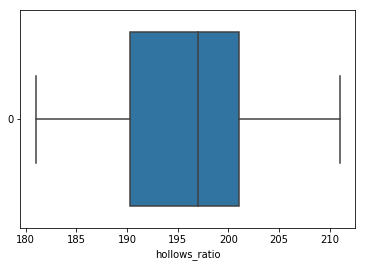

In [12]:
#boxplot cleaned data
for column in vehicle_df_out_normalized.select_dtypes(include=[np.number]):
    plt.figure()
    box_plot = sns.boxplot(data=vehicle_df_out_normalized[column], orient="h")
    box_plot.set(xlabel=column)

#### I now  have 2 data sets 

a-vehicle_df_na_removed :: which is the NaN imputed (but without outliers normalized)


b-vehicle_df_out_normalized :: which is a copy of a and also with outliers normalized to 5th and 95th percentile

#### Standardize the data

In [13]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any modelling. You can use zscore function to do this

In [14]:
interest_df = vehicle_df_out_normalized.copy()

In [15]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [16]:
interest_df_z.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.161898     0.545148              0.057177      0.286237   
1    -0.327266    -0.607428              0.120741     -0.839225   
2     1.262519     0.874455              1.519141      1.229192   
3    -0.082684    -0.607428             -0.006386     -0.291703   
4    -1.061013    -0.113467             -0.769150      1.107521   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0              1.401479                 0.343390      -0.203152   
1             -0.622277                 0.111355      -0.596837   
2              0.591977                 0.343390       1.159604   
3              0.187225                 0.111355      -0.748254   
4              5.583908                10.088858      -0.596837   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0       0.136262               -0.203971                   0.772874   
1       0.520519               -0.597717                  -0.336583   
2      -1.144597                0.977268                   0.703533   
3       0.648605               -0.597717                  -0.336583   
4       0.520519               -0.597717                  -0.267242   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0        -0.398747          -0.338398                   0.293092   
1        -0.592269          -0.617900                  -0.510230   
2         1.117171           1.121860                   1.405385   
3        -0.914805          -0.737687                  -1.468037   
4         1.697736          -0.646421                   0.416681   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.333970       -0.023785          0.409713   
1                    -0.054367        0.611659          0.182274   
2                     0.085434        1.670734         -0.386323   
3                    -1.312579       -0.023785         -0.272604   
4                     7.634704        0.611659         -0.158885   

   skewness_about_2  hollows_ratio  
0         -0.279530       0.183957  
1          0.050062       0.452977  
2         -0.114734       0.049447  
3          1.698020       1.529056  
4         -1.433100      -1.699181

### 2. Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (15 points)

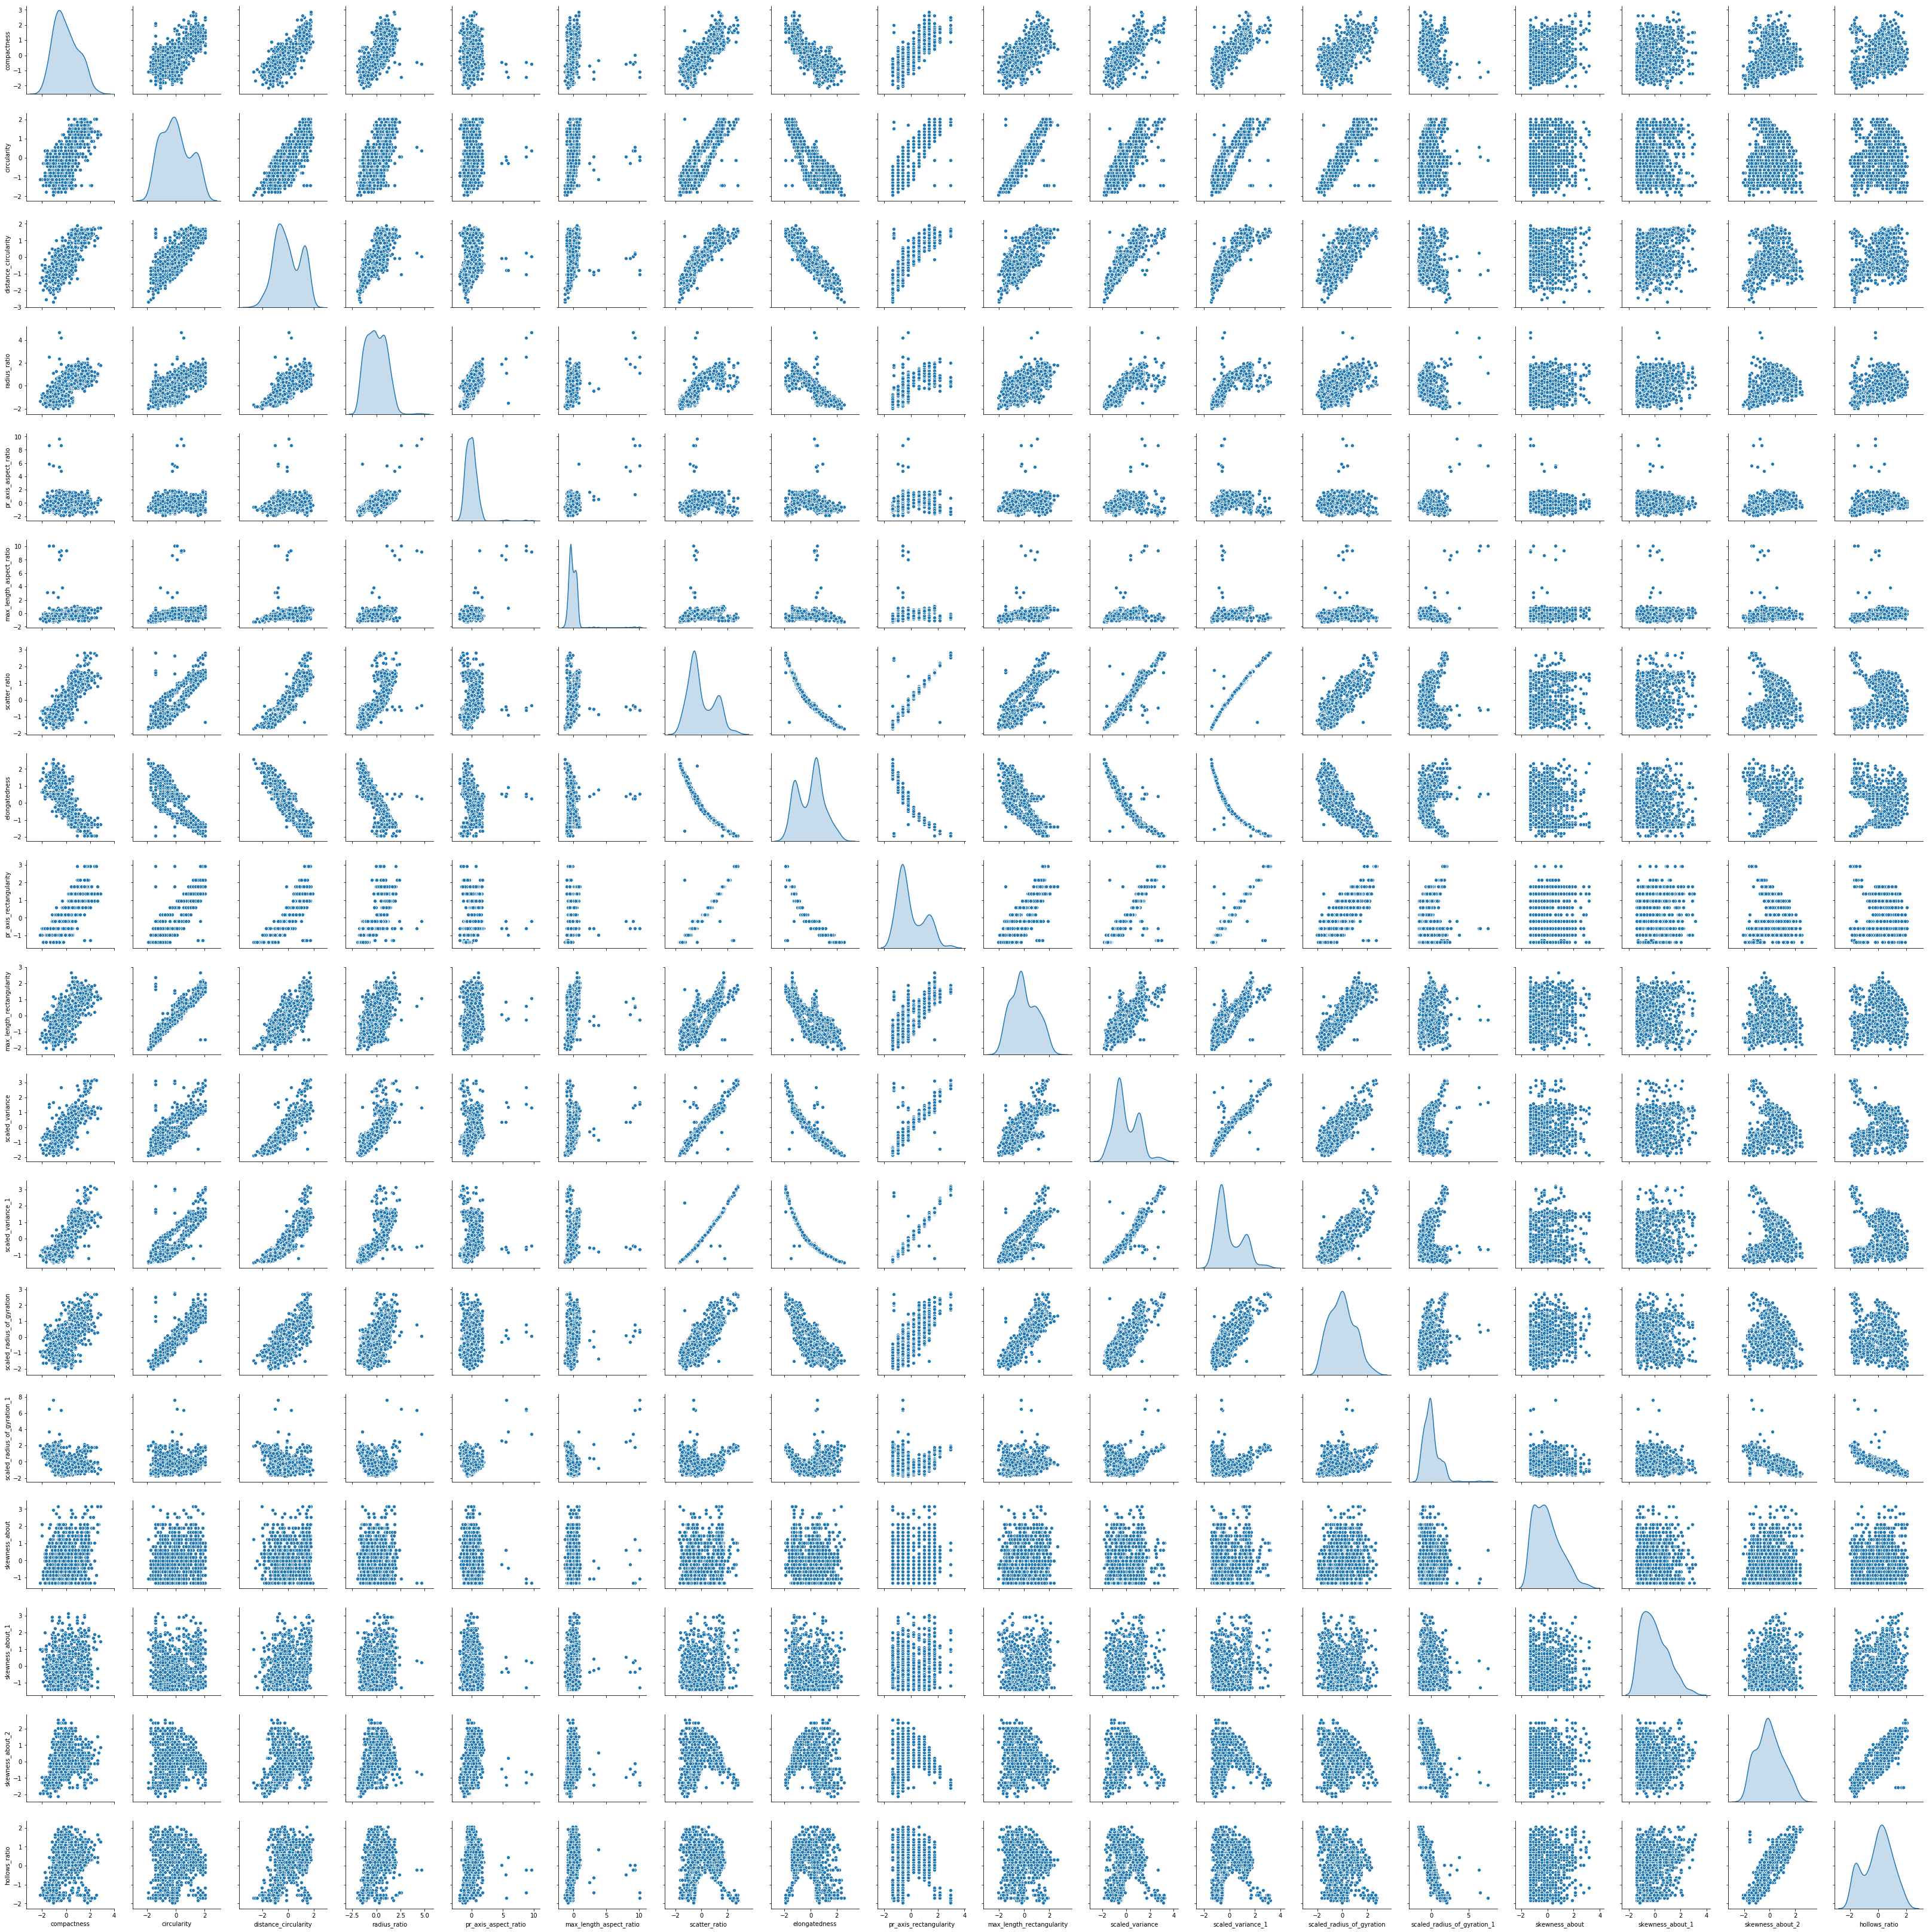

In [17]:
sns.pairplot(interest_df_z, diag_kind="kde")

### Observations
#### 1 from the KDE on the diagonal we can see there are atleast 2 classes and possibly a 3rd
#### 2 several of the independent fields have strong co-relation with each other as we see an elongated cloud in multple places Ex :: Scaled_Variance vs scatter_ratio Scaled_Variance_1 vs scatter_ratio
#### 3. There are some corelation that is slightly non linear also . ex :: elongatedness vs scatter ratio 

In [18]:
corr = interest_df_z.corr()
print (corr)

                             compactness  circularity  distance_circularity  \
compactness                     1.000000     0.662783              0.790168   
circularity                     0.662783     1.000000              0.767622   
distance_circularity            0.790168     0.767622              1.000000   
radius_ratio                    0.706605     0.610519              0.781705   
pr_axis_aspect_ratio            0.098308     0.164195              0.168678   
max_length_aspect_ratio         0.173223     0.269235              0.289502   
scatter_ratio                   0.808292     0.807296              0.902208   
elongatedness                  -0.789437    -0.793754             -0.911307   
pr_axis_rectangularity          0.788125     0.781698              0.875371   
max_length_rectangularity       0.673540     0.912141              0.765461   
scaled_variance                 0.767337     0.761048              0.863809   
scaled_variance_1               0.809510     0.79637

### Observation, high co-variance found, i many places more than 0.5 covariance

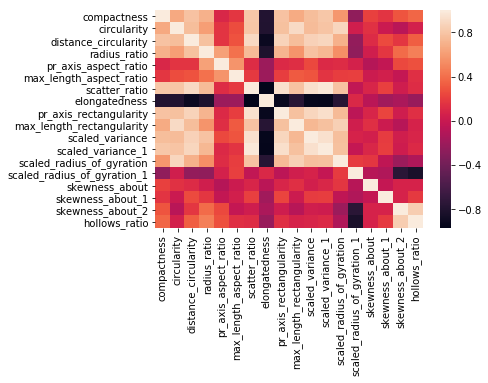

In [19]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [20]:
# ref ::https://www.statsmodels.org/stable/generated/statsmodels.stats.outliers_influence.variance_inflation_factor.html

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - sm.OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [21]:
df_tmp = interest_df_z.copy()
variance_inflation_factors(df_tmp)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                           1.000000
compactness                     5.050814
circularity                     8.723132
distance_circularity           11.042702
radius_ratio                   20.636286
pr_axis_aspect_ratio            7.710081
max_length_aspect_ratio         2.758036
scatter_ratio                  47.617249
elongatedness                  27.723714
pr_axis_rectangularity         10.342068
max_length_rectangularity       8.477741
scaled_variance                19.833070
scaled_variance_1              30.805092
scaled_radius_of_gyration       7.797358
scaled_radius_of_gyration_1    10.025446
skewness_about                  1.203265
skewness_about_1                1.420836
skewness_about_2                5.034288
hollows_ratio                   9.929013
Name: VIF, dtype: float64

#### VIF Guide :: A value of 1 means that the predictor is not correlated with other variables. The higher the value, the greater the correlation of the variable with other variables. Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values of 10 or more being regarded as very high.

Based on this we can see that distance_circularity, radius_ratio, scatter_ratio, elongatedness, pr_axis_rectangularity, scaled_variance, scaled_variance_1, scaled_radius_of_gyration_1, hollows_ratio  all these will cause problems.

### 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 20 points


In [22]:
covMatrix = np.cov(interest_df_z,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.66356774  0.79110298  0.70744134  0.0984242   0.17342849
   0.80924881 -0.79037098  0.78905754  0.67433692  0.76824504  0.81046833
   0.58066335 -0.25907595  0.22073624  0.16521738  0.29625041  0.36492809]
 [ 0.66356774  1.00118343  0.7685308   0.61124128  0.16438885  0.26955317
   0.80825164 -0.79469345  0.78262269  0.91322001  0.76194906  0.79732
   0.88818587  0.04029727  0.15087664  0.01266283 -0.06927723  0.05995085]
 [ 0.79110298  0.7685308   1.00118343  0.78263059  0.16887726  0.28984455
   0.90327561 -0.9123854   0.87640715  0.76636644  0.86483131  0.88665588
   0.70165421 -0.23733261  0.11893421  0.25573424  0.17378401  0.33312625]
 [ 0.70744134  0.61124128  0.78263059  1.00118343  0.63030217  0.4162599
   0.75357871 -0.80787717  0.72187654  0.57037288  0.78690679  0.73766994
   0.539693   -0.25670052  0.04610698  0.17437098  0.39318942  0.47681528]
 [ 0.0984242   0.16438885  0.16887726  0.63030217  1.00118343  0.56418739
   0.12532674 -0.20088738  0.11175737 

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(interest_df_z)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
print(pca.explained_variance_)

[9.30942553 2.98695576 1.70805308 1.14250309 0.93839322 0.5693209
 0.40500873 0.24311424 0.18360987 0.11124655]


In [25]:
print(pca.components_)

[[ 2.77750911e-01  2.84746580e-01  3.07250669e-01  2.74290294e-01
   8.48577180e-02  1.03676054e-01  3.16426226e-01 -3.16038605e-01
   3.07339452e-01  2.80502824e-01  3.08662504e-01  3.13130918e-01
   2.69312212e-01 -3.18997616e-02  4.42254916e-02  6.19060456e-02
   4.23389505e-02  8.11774418e-02]
 [-1.10939869e-01  1.27915077e-01 -6.27660376e-02 -1.92949928e-01
  -1.43927013e-01  1.48610878e-03  5.70726926e-02  4.15607066e-04
   4.65316862e-02  1.27841282e-01  6.72366887e-02  6.26419515e-02
   2.22292879e-01  5.01101667e-01 -2.56114248e-02 -1.07997018e-01
  -5.28757130e-01 -5.35548676e-01]
 [-1.36438976e-01 -8.02258341e-03 -5.90378304e-02  2.47247955e-01
   6.53658778e-01  5.89563930e-01 -9.27878164e-02  5.39622829e-02
  -9.50066687e-02 -5.05216571e-03  3.31698726e-02 -1.06079352e-01
  -1.86149009e-02  2.61837799e-01 -1.71065605e-01 -1.01182187e-01
  -1.13322682e-02  1.96466331e-02]
 [ 6.43626738e-02  1.90498499e-01 -6.16965263e-02 -4.02074563e-02
   2.75026849e-02  5.10947609e-02 -9.

In [26]:
print(pca.explained_variance_ratio_)

[0.51657897 0.16574584 0.09477967 0.06339737 0.05207133 0.03159155
 0.02247389 0.01349038 0.01018849 0.00617306]


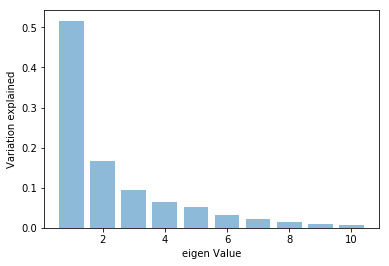

In [27]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

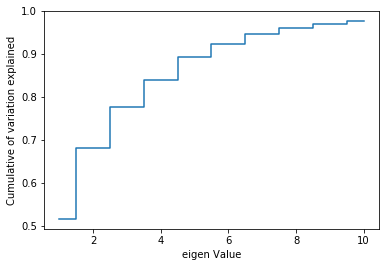

In [28]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cumulative of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [29]:
# 95 Per cent qantification
print(pca.explained_variance_ratio_.cumsum())

[0.51657897 0.68232481 0.77710448 0.84050185 0.89257318 0.92416474
 0.94663862 0.96012901 0.9703175  0.97649055]


### Looks like to capture 95% of the of variance we need 8 components

In [30]:
# Lets get optimal PCA
pca_final = PCA(n_components=8)
pca_final.fit(interest_df_z)
print(pca_final.components_)
print(pca_final.explained_variance_ratio_)
interest_df_z_pca = pca_final.transform(interest_df_z)
interest_df_z_pca.shape

[[ 2.77750911e-01  2.84746580e-01  3.07250669e-01  2.74290294e-01
   8.48577180e-02  1.03676054e-01  3.16426226e-01 -3.16038605e-01
   3.07339452e-01  2.80502824e-01  3.08662504e-01  3.13130918e-01
   2.69312212e-01 -3.18997616e-02  4.42254916e-02  6.19060456e-02
   4.23389505e-02  8.11774418e-02]
 [-1.10939869e-01  1.27915077e-01 -6.27660376e-02 -1.92949928e-01
  -1.43927013e-01  1.48610878e-03  5.70726926e-02  4.15607066e-04
   4.65316862e-02  1.27841282e-01  6.72366887e-02  6.26419515e-02
   2.22292879e-01  5.01101667e-01 -2.56114248e-02 -1.07997018e-01
  -5.28757130e-01 -5.35548676e-01]
 [-1.36438976e-01 -8.02258341e-03 -5.90378304e-02  2.47247955e-01
   6.53658778e-01  5.89563930e-01 -9.27878164e-02  5.39622829e-02
  -9.50066687e-02 -5.05216571e-03  3.31698726e-02 -1.06079352e-01
  -1.86149009e-02  2.61837799e-01 -1.71065605e-01 -1.01182187e-01
  -1.13322682e-02  1.96466331e-02]
 [ 6.43626738e-02  1.90498499e-01 -6.16965263e-02 -4.02074563e-02
   2.75026849e-02  5.10947609e-02 -9.

(846, 8)

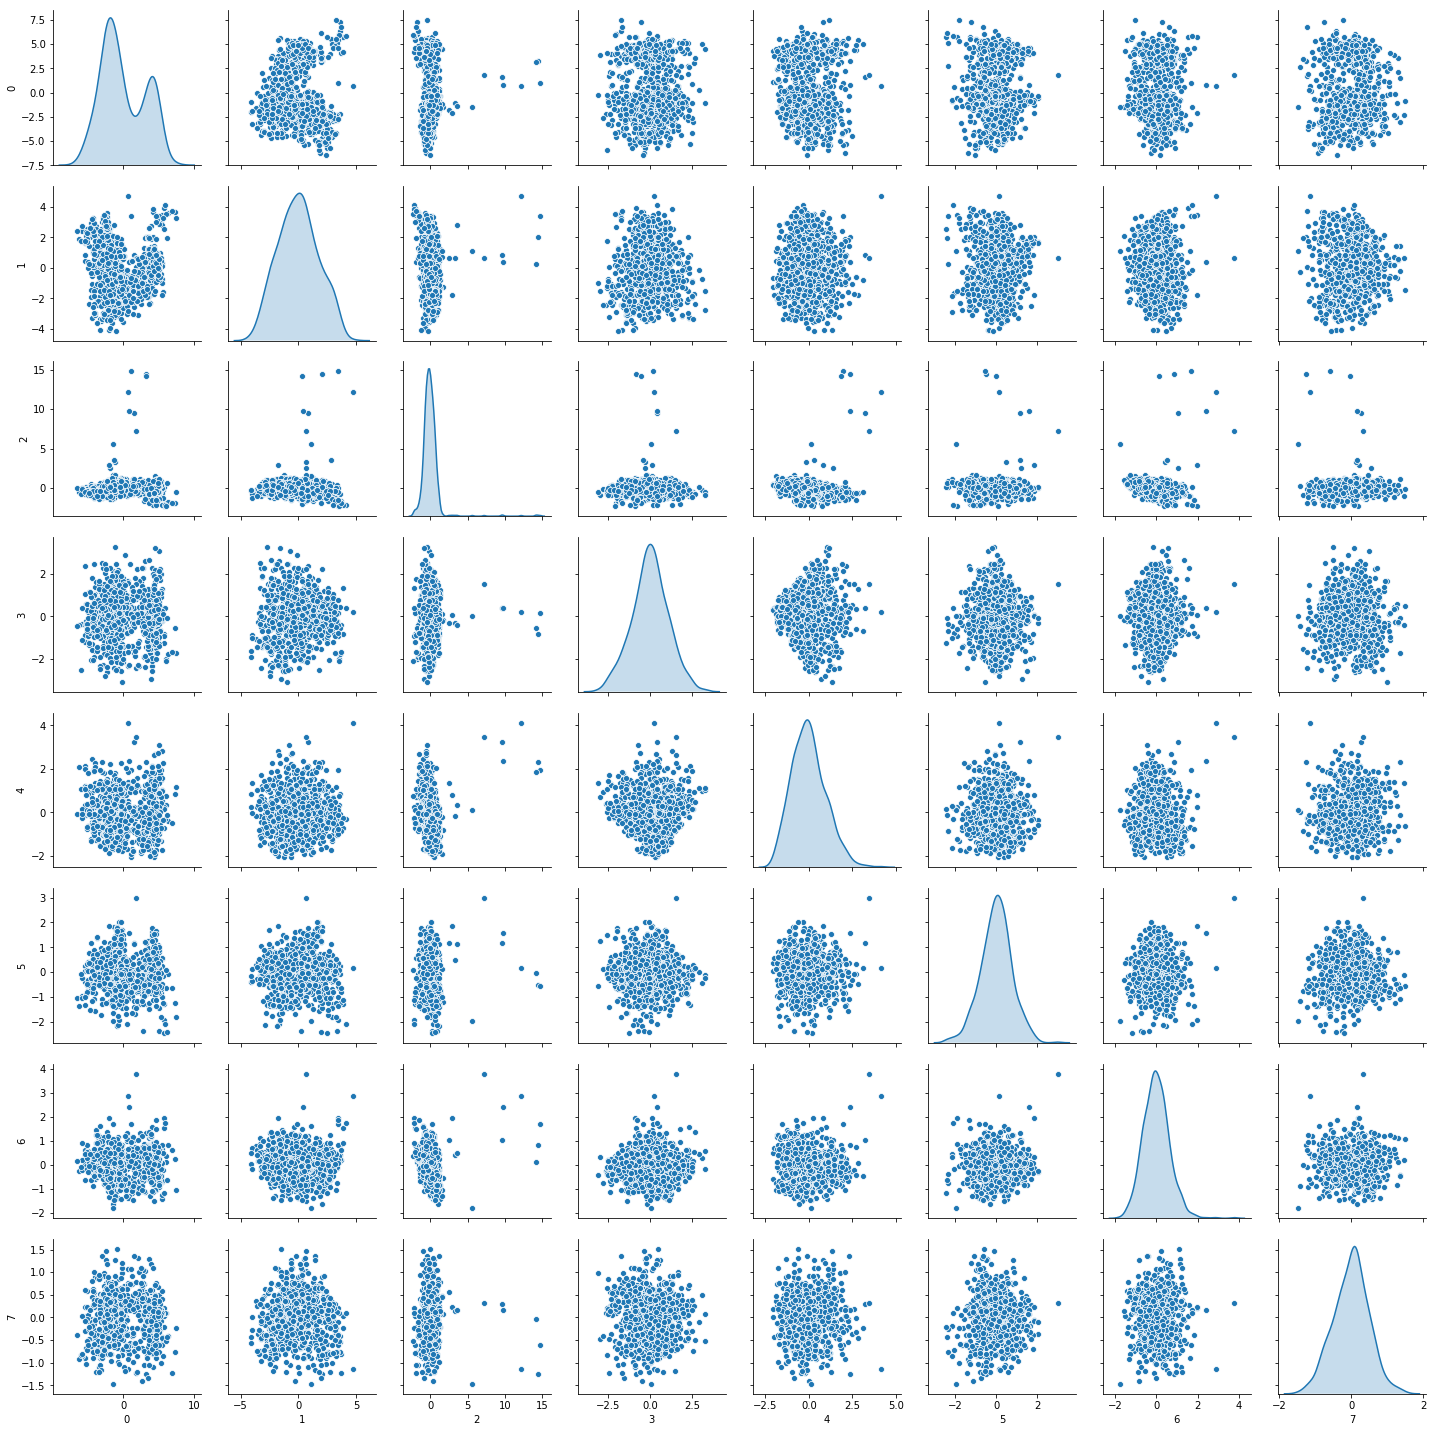

In [31]:
sns.pairplot(pd.DataFrame(interest_df_z_pca), diag_kind='kde')

### 2 frames of interest now ::
1. interest_df_z_pca -- with PCA
2. interest_df_z -- without PCA

### 4. Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 20 points

In [32]:
y = vehicle_df['class'].values.ravel()

In [33]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_PCA_train, X_PCA_test, y_train, y_test = train_test_split(interest_df_z_pca, y, test_size=0.30, random_state=1)

## With PCA

In [34]:
from sklearn import svm
clf_PCA = svm.SVC(gamma=0.025, C=3)
clf_PCA.fit(X_PCA_train,y_train)
pred_train = clf_PCA.predict(X_PCA_train)

In [35]:
clf_PCA.score(X_PCA_train, y_train)

0.9577702702702703

In [36]:
pred_test = clf_PCA.predict(X_PCA_test)
clf_PCA.score(X_PCA_test, y_test)

0.9409448818897638

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[148   6   5]
 [  3 288   5]
 [  0   6 131]]


In [38]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[ 57   1   1]
 [  2 127   4]
 [  4   3  55]]


In [39]:
from sklearn import metrics
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

         bus       0.90      0.97      0.93        59
         car       0.97      0.95      0.96       133
         van       0.92      0.89      0.90        62

   micro avg       0.94      0.94      0.94       254
   macro avg       0.93      0.94      0.93       254
weighted avg       0.94      0.94      0.94       254



In [40]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(interest_df_z, y, test_size=0.30, random_state=1)

## Without PCA

In [41]:
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train,y_train)
pred_train = clf.predict(X_train)

In [42]:
clf.score(X_train, y_train)

0.9797297297297297

In [43]:
pred_test = clf.predict(X_test)
clf.score(X_test, y_test)

0.9488188976377953

In [44]:
mat_train = confusion_matrix(y_train,pred_train)
print("Train set confusion matrix = \n",mat_train)

Train set confusion matrix = 
 [[156   0   3]
 [  1 292   3]
 [  0   5 132]]


In [45]:
mat_test = confusion_matrix(y_test,pred_test)
print("Test set confusion matrix = \n",mat_test)

Test set confusion matrix = 
 [[ 57   1   1]
 [  2 128   3]
 [  5   1  56]]


In [46]:
print("SVM Metrics = \n", metrics.classification_report(y_test, pred_test))

SVM Metrics = 
               precision    recall  f1-score   support

         bus       0.89      0.97      0.93        59
         car       0.98      0.96      0.97       133
         van       0.93      0.90      0.92        62

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.95      0.95       254



### Comparison

|Model Name         |Dimension          | Training Accuracy | Testing Accuracy | class | precision   | recall      | f1 Score    | support    |
 |------------------ |------------------ | ----------------- | ---------------- | ----- | ----------- | ----------- | ----------- | ---------- |
 |SVM - PCA          |8                  |0.9577             |0.9409            |    -   |     -      |     -       |    -        |     -      |
 |    -     |      -           |-|-|bus|0.90|0.97|0.93|59|
 |    -     |      -           |-|-|car|0.97|0.95|0.96|133|
 |    -     |       -          |-|-|van|0.92|0.89|0.90|62|
 |SVM - Non PCA      |18                 |0.9797|0.9488|-|-|-|-| -  |
  |    -     |         -        |-|-|bus|0.89|0.97|0.93|59|
 |     -    |          -       |-|-|car|0.98|0.96|0.97|133|
 |     -    |           -     |-|-|van|0.93|0.90|0.92|62|
 
 ### Summary :: Overall considering that we have reduced 10 dimensions the accuracy for PCA is remarkable. Also the difference in training and testing accuracy is close by for PCA .. Which probably indicates that we will get good results in production also

### 5. Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy

## We will take the PCA data set as our base for further analyis.

In [47]:
# Ref :: https://medium.com/@aneesha/svm-parameter-tuning-in-scikit-learn-using-gridsearchcv-2413c02125a0
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, make_scorer
#Grid Search
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    Cs = [0.01, 0.05, 0.5, 1]
    gammas = [0.001, 0.01, 0.1, 1]
    kernels = ['linear', 'rbf']
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel' : kernels}
    # https://stackoverflow.com/questions/50752553/gridsearchcv-for-the-multi-class-svm-in-python
    my_scorer = make_scorer(accuracy_score, greater_is_better=True)
    grid_search = GridSearchCV(svm.SVC(), param_grid, cv=nfolds, scoring = my_scorer)
    grid_search.fit(X, y)
 
    return grid_search

In [48]:
grid_clf_acc = svc_param_selection(X_PCA_train, y_train,8 )
print (grid_clf_acc.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [49]:
grid_clf_acc.score(X_PCA_train, y_train)

0.9712837837837838

In [50]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_PCA_test)
grid_clf_acc.score(X_PCA_test, y_test)

0.9330708661417323

In [51]:
print("SVM Metrics = \n", metrics.classification_report(y_test, y_pred_acc))

SVM Metrics = 
               precision    recall  f1-score   support

         bus       0.94      0.98      0.96        59
         car       0.95      0.94      0.94       133
         van       0.90      0.87      0.89        62

   micro avg       0.93      0.93      0.93       254
   macro avg       0.93      0.93      0.93       254
weighted avg       0.93      0.93      0.93       254



In [52]:
#SVM (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

array([[ 58,   0,   1],
       [  3, 125,   5],
       [  1,   7,  54]], dtype=int64)

### Try with NON PCA also

In [53]:
grid_clf_acc_Non_PCA = svc_param_selection(X_train, y_train,8 )
print (grid_clf_acc_Non_PCA.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [54]:
grid_clf_acc_Non_PCA.score(X_train, y_train)

0.9831081081081081

In [55]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc_Non_PCA.predict(X_test)
grid_clf_acc_Non_PCA.score(X_test, y_test)

0.937007874015748

In [56]:
print("SVM Metrics = \n", metrics.classification_report(y_test, y_pred_acc))

SVM Metrics = 
               precision    recall  f1-score   support

         bus       0.89      0.98      0.94        59
         car       0.98      0.95      0.96       133
         van       0.90      0.87      0.89        62

   micro avg       0.94      0.94      0.94       254
   macro avg       0.92      0.93      0.93       254
weighted avg       0.94      0.94      0.94       254



## Summary 

With SVM based grid search and both  PCA & non PCA  data, it is found that the ideal combination is :: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Note that the scorer used is for higher accuracy


|Model|Training Accuracy|Testing Accuracy| class | precision   | recall      | f1 Score    | support    |
|-|-|-| ----- | ----------- | ----------- | ----------- | ---------- |
|Grid SVM PCA|0.97128|0.93307|-        | -      | -    |  -     |    -  |
|-|-|-|bus        | 0.94       | 0.98    |  0.96     |    59  |
|-|-|-|car        |0.95        |  0.94   |    0.94   |   133  |
|-|-|-|van        |0.90        | 0.87    | 0.89      |    62  |
|Grid SVM Non PCA|0.98310|0.93700|-        | -      | -    |  -     |    -  |
|-|-|-|bus        | 0.89       | 0.98    |  0.94     |    59  |
|-|-|-|car        |0.98        |  0.95   |    0.96   |   133  |
|-|-|-|van        |0.90        | 0.87    | 0.89      |    62  |


## Just trying clustering for unsupervised

In [57]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(interest_df_z, 'ward', metric='euclidean')
Z.shape

(845, 4)

In [58]:
Z[:]

array([[1.37000000e+02, 3.99000000e+02, 1.33314777e-01, 2.00000000e+00],
       [5.10000000e+02, 7.85000000e+02, 3.99162559e-01, 2.00000000e+00],
       [4.79000000e+02, 5.58000000e+02, 5.54358879e-01, 2.00000000e+00],
       ...,
       [1.67200000e+03, 1.68600000e+03, 4.72310224e+01, 2.85000000e+02],
       [1.68500000e+03, 1.68700000e+03, 5.48551354e+01, 5.61000000e+02],
       [1.68800000e+03, 1.68900000e+03, 1.10395477e+02, 8.46000000e+02]])

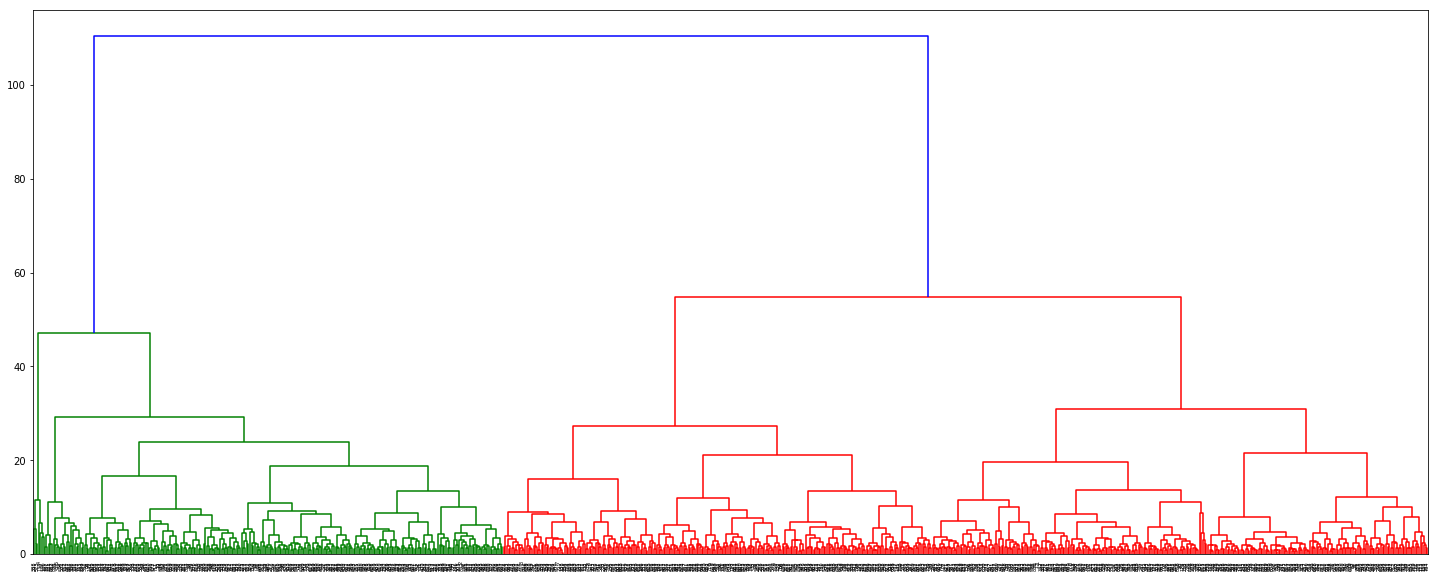

In [59]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

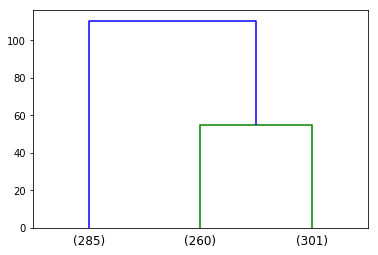

In [60]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram (since we know 3 type of vehicles)
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [61]:
max_d = 50
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 3, 3,
       2, 3, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 3, 3, 2,
       1, 3, 3, 3, 3, 2, 3, 2, 1, 3, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 1, 3,
       3, 1, 2, 1, 1, 1, 2, 3, 3, 1, 2, 3, 1, 3, 3, 1, 3, 3, 2, 1, 3, 3,
       2, 3, 1, 2, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 2, 1, 1, 1, 2, 3, 1,
       2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 1, 2,
       1, 3, 1, 1, 3, 2, 3, 2, 2, 3, 1, 3, 2, 1, 3, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 3, 2, 2, 3, 1, 2, 3, 1, 1, 2, 1, 3, 3, 1, 1, 2, 1, 3, 2,
       2, 3, 2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 3, 1, 3,
       3, 3, 3, 2, 1, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 2, 3, 1, 3, 2,
       1, 3, 1, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 2, 2,
       3, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 3, 1, 2, 2, 1, 1, 3, 2, 2, 2,
       1, 3, 3, 2, 2, 3, 3, 1, 2, 2, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 3, 2,
       2, 3, 1, 3, 3, 1, 2, 2, 1, 2, 1, 3, 1, 2, 1,

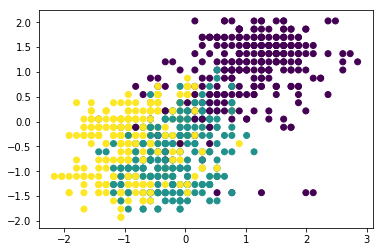

In [62]:
#### plt.figure(figsize=(10, 8))
plt.scatter(interest_df_z['compactness'], interest_df_z['circularity'], c=clusters)  # plot points with cluster dependent colors
plt.show()

In [63]:
# Just trying clustering for unsupervised with PCA
#### generate the linkage matrix
Z_PCA = linkage(interest_df_z_pca, 'ward', metric='euclidean')
Z_PCA.shape


(845, 4)

In [64]:
Z_PCA[:]

array([[1.37000000e+02, 3.99000000e+02, 1.21814285e-01, 2.00000000e+00],
       [5.10000000e+02, 7.85000000e+02, 2.69779023e-01, 2.00000000e+00],
       [2.66000000e+02, 5.80000000e+02, 3.65581273e-01, 2.00000000e+00],
       ...,
       [1.67000000e+03, 1.68500000e+03, 4.72315762e+01, 2.59000000e+02],
       [1.68600000e+03, 1.68700000e+03, 5.44984892e+01, 5.87000000e+02],
       [1.68800000e+03, 1.68900000e+03, 1.09112070e+02, 8.46000000e+02]])

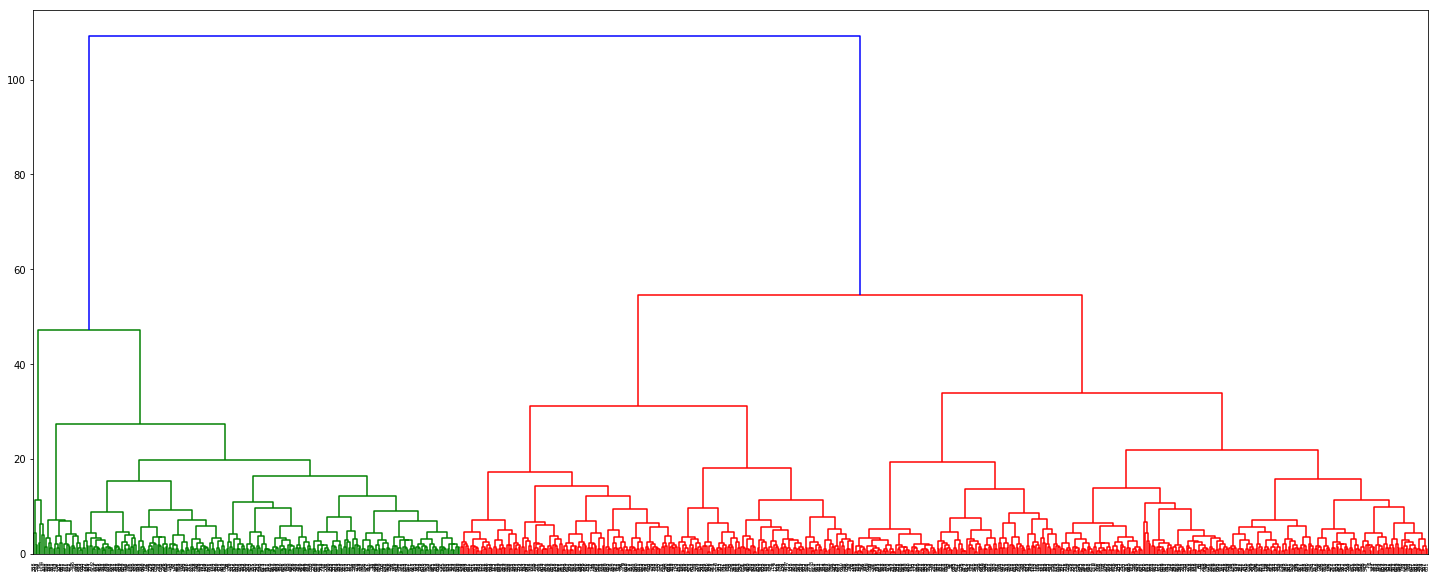

In [65]:
plt.figure(figsize=(25, 10))
dendrogram(Z_PCA)
plt.show()

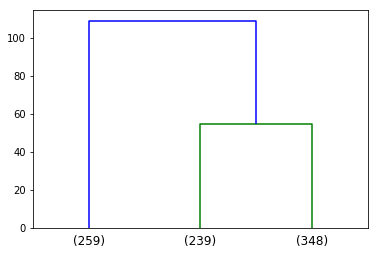

In [66]:
dendrogram(
    Z_PCA,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [67]:
max_d = 50
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z_PCA, max_d, criterion='distance')
clusters

array([3, 3, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 3, 3,
       2, 2, 1, 3, 3, 1, 1, 3, 3, 2, 2, 1, 2, 2, 3, 1, 1, 3, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 1, 3, 1, 3, 3, 3, 2, 3,
       3, 1, 3, 1, 1, 1, 2, 3, 3, 1, 3, 3, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3,
       2, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 3, 1, 2, 2, 3, 2, 1, 1, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 1, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 1, 2,
       2, 3, 1, 1, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 3, 3, 2, 3, 1, 2, 3, 1, 1, 2, 1, 3, 3, 1, 1, 2, 1, 3, 3,
       2, 3, 2, 3, 1, 3, 2, 3, 1, 2, 2, 2, 1, 3, 1, 3, 2, 1, 3, 3, 1, 3,
       3, 3, 3, 2, 1, 1, 2, 3, 2, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 1, 3, 2,
       1, 3, 1, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 1, 2, 3, 2, 3, 1, 3, 2, 2,
       3, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 3, 1, 2, 2, 1, 1, 3, 2, 3, 2,
       1, 3, 3, 2, 2, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 3, 3, 1, 3, 2,
       3, 3, 1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 2, 2, 1,

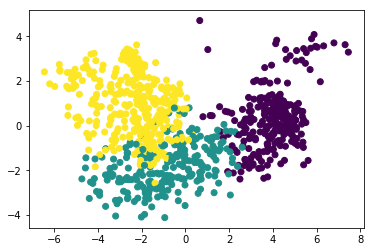

In [68]:
#### plt.figure(figsize=(10, 8))
plt.scatter(interest_df_z_pca[:,0], interest_df_z_pca[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()